## 멜버른 에어비앤비 오픈 데이터
호주 빅토리아주 멜버른의 에어비앤비 활동에 대한 상세하고 요약된 데이터
- 목록: 전체 설명과 평균 검토 점수를 포함한 자세한 목록 데이터
- 달력: 목록 ID와 그 날의 가격 및 가용성을 포함한 목록에 대한 자세한 달력 데이터
- 리뷰: 각 리뷰어의 고유 ID 및 자세한 의견을 포함한 목록에 대한 자세한 검토 데이터
- 목록 요약: 목록에 대한 요약 정보 및 지표 (시각화에 좋음)
- 리뷰 요약: 요약 검토 데이터 및 목록 ID (목록과 연결된 시간 기반 분석 및 시각화를 용이하게 하기 위해)
- 이웃: 지리 필터를 위한 이웃 목록. 도시 또는 오픈 소스 GIS 파일에서 출처

### 기대효과
- 에어비앤비는 실제로 어떻게 사용되고 있으며 이웃에 영향을 미치고 있나요?
- 목록 설명을 사용하여 각 멜버른 지역의 분위기를 설명할 수 있나요?
- 멜버른을 방문하기에 일년 중 가장 바쁜 시기는 언제인가요? 가격이 얼마나 급등하나요?
- 새로운 에어비앤비 목록과 총 에어비앤비 방문자 모두의 일반적인 상승 추세가 있나요?

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/tylerx/melbourne-airbnb-open-data/listings_summary_dec18.csv')
df.head()

id                                              name  host_id  \
0   9835                            Beautiful Room & House    33057   
1  10803          Room in Cool Deco Apartment in Brunswick    38901   
2  12936  St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC    50121   
3  15246                  Large private room-close to city    59786   
4  16760                  Melbourne BnB near City & Sports    65090   

       host_name  neighbourhood_group neighbourhood   latitude   longitude  \
0          Manju                  NaN    Manningham -37.772684  145.092133   
1        Lindsay                  NaN      Moreland -37.766505  144.980736   
2  Frank & Vince                  NaN  Port Phillip -37.859755  144.977369   
3          Eleni                  NaN       Darebin -37.758971  144.989228   
4          Colin                  NaN  Port Phillip -37.864530  144.992238   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60               1                  4  2015-09-12   
1     Private room     35               3                108  2018-11-26   
2  Entire home/apt    159               3                 15  2018-11-07   
3     Private room     50               2                 29  2017-05-15   
4     Private room     69               1                 63  2018-11-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.04                               1               365  
1               1.50                               1               213  
2               0.15                              17               326  
3               0.30                               3                 0  
4               0.74                               1               328

In [63]:
df.shape

(22895, 16)

In [64]:
len(df.columns)

16

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22895 non-null  int64  
 1   name                            22892 non-null  object 
 2   host_id                         22895 non-null  int64  
 3   host_name                       22892 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   22895 non-null  object 
 6   latitude                        22895 non-null  float64
 7   longitude                       22895 non-null  float64
 8   room_type                       22895 non-null  object 
 9   price                           22895 non-null  int64  
 10  minimum_nights                  22895 non-null  int64  
 11  number_of_reviews               22895 non-null  int64  
 12  last_review                     

## 결측값 확인

<Axes: >

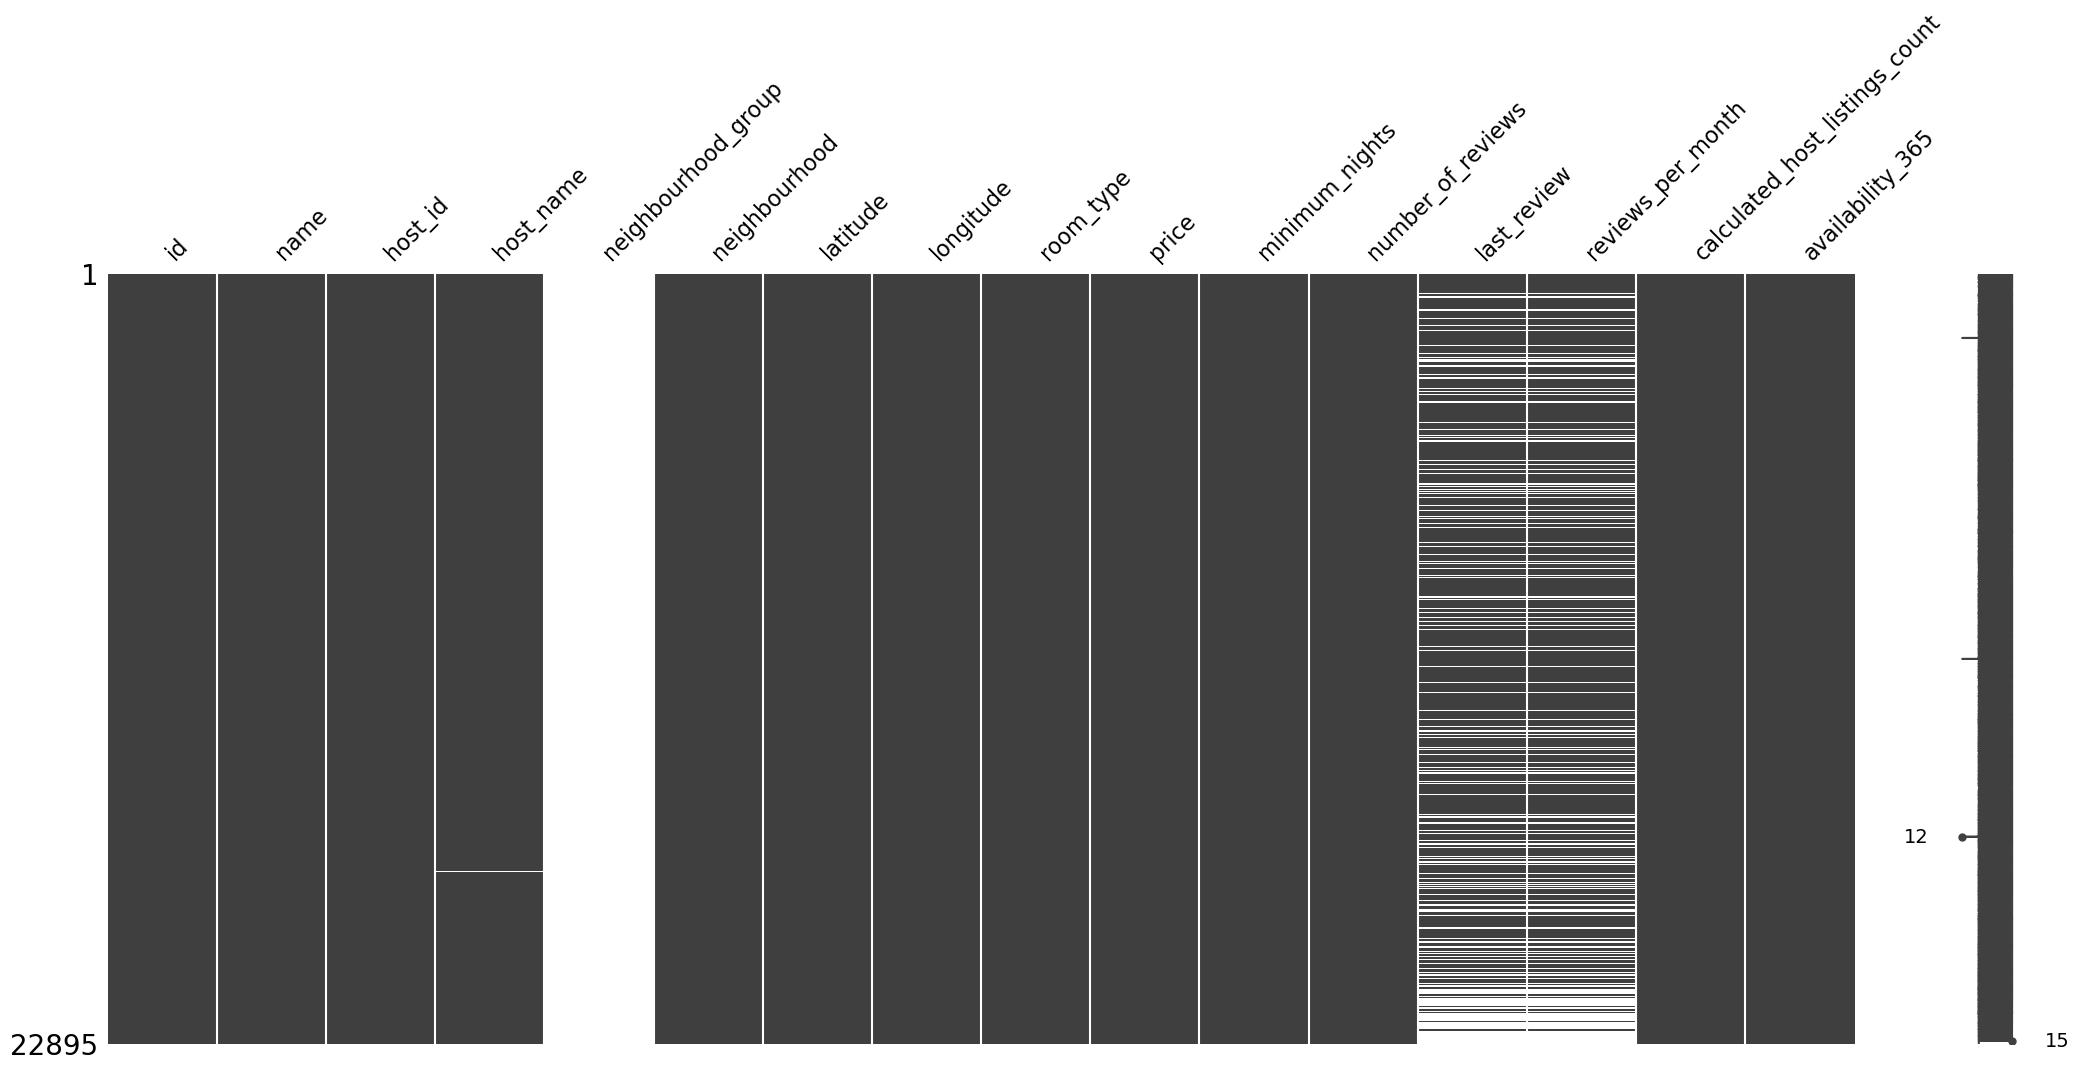

In [66]:
import missingno as msno
msno.matrix(df)

In [67]:
df.isna().sum()

id                                    0
name                                  3
host_id                               0
host_name                             3
neighbourhood_group               22895
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        5242
reviews_per_month                  5242
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [68]:
df.isnull().sum()

id                                    0
name                                  3
host_id                               0
host_name                             3
neighbourhood_group               22895
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        5242
reviews_per_month                  5242
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [69]:
for col in df.columns:
    print('unique values in {} is {}'.format(col, len(df[col].unique())))

unique values in id is 22895
unique values in name is 22450
unique values in host_id is 14988
unique values in host_name is 5818
unique values in neighbourhood_group is 1
unique values in neighbourhood is 30
unique values in latitude is 22895
unique values in longitude is 22895
unique values in room_type is 3
unique values in price is 458
unique values in minimum_nights is 70
unique values in number_of_reviews is 298
unique values in last_review is 1190
unique values in reviews_per_month is 852
unique values in calculated_host_listings_count is 51
unique values in availability_365 is 366


## id 값으로 인덱스 변경

In [70]:
df.set_index('id', inplace=True)
df.head()

name  host_id  \
id                                                                 
9835                             Beautiful Room & House    33057   
10803          Room in Cool Deco Apartment in Brunswick    38901   
12936  St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC    50121   
15246                  Large private room-close to city    59786   
16760                  Melbourne BnB near City & Sports    65090   

           host_name  neighbourhood_group neighbourhood   latitude  \
id                                                                   
9835           Manju                  NaN    Manningham -37.772684   
10803        Lindsay                  NaN      Moreland -37.766505   
12936  Frank & Vince                  NaN  Port Phillip -37.859755   
15246          Eleni                  NaN       Darebin -37.758971   
16760          Colin                  NaN  Port Phillip -37.864530   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
id                                                                             
9835   145.092133     Private room     60               1                  4   
10803  144.980736     Private room     35               3                108   
12936  144.977369  Entire home/apt    159               3                 15   
15246  144.989228     Private room     50               2                 29   
16760  144.992238     Private room     69               1                 63   

      last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                     
9835   2015-09-12               0.04                               1   
10803  2018-11-26               1.50                               1   
12936  2018-11-07               0.15                              17   
15246  2017-05-15               0.30                               3   
16760  2018-11-22               0.74                               1   

       availability_365  
id                       
9835                365  
10803               213  
12936               326  
15246                 0  
16760               328

## 단일 종류의 컬럼 제거

In [71]:
df = df.loc[:, df.nunique() != 1]
df.shape

(22895, 15)

## 중복되는 값 확인

In [72]:
print('Number of observation before'+ ': '+ str(len(df)))
df.drop_duplicates(inplace=True)
print('Number of observation after'+ ': '+ str(len(df)))

Number of observation before: 22895
Number of observation after: 22895


## 관련 없는 특징 삭제하기
이름은 도움이 될 수 있는 중요한 컬럼이지만, 텍스트 분석을 수행하지 않을 것이기 때문에 삭제

In [73]:
df.drop(['name', 'host_name'], axis=1, inplace=True)
df.shape

(22895, 13)

## 각 컬럼의 null 값 처리
drop, fillna

In [74]:
df.isnull().sum() / len(df)

host_id                           0.000000
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.228958
reviews_per_month                 0.228958
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [75]:
df.drop(['neighbourhood_group', 'last_review'], axis=1, inplace=True)

In [76]:
df.shape

(22895, 11)

In [77]:
df.head()

host_id neighbourhood   latitude   longitude        room_type  price  \
id                                                                            
9835     33057    Manningham -37.772684  145.092133     Private room     60   
10803    38901      Moreland -37.766505  144.980736     Private room     35   
12936    50121  Port Phillip -37.859755  144.977369  Entire home/apt    159   
15246    59786       Darebin -37.758971  144.989228     Private room     50   
16760    65090  Port Phillip -37.864530  144.992238     Private room     69   

       minimum_nights  number_of_reviews  reviews_per_month  \
id                                                            
9835                1                  4               0.04   
10803               3                108               1.50   
12936               3                 15               0.15   
15246               2                 29               0.30   
16760               1                 63               0.74   

       calculated_host_listings_count  availability_365  
id                                                       
9835                                1               365  
10803                               1               213  
12936                              17               326  
15246                               3                 0  
16760                               1               328

In [78]:
#df['reviews_per_month'] = df['reviews_per_month'].fillna(0, inplace=True)
#df.fillna({'reviews_per_month': 0}, inplace=True)
#df['reviews_per_month'].replace(np.NaN, 0, inplace=True)
#df.isnull().any()

In [79]:
df.isnull().sum()

host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5242
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [80]:
df['price'].describe()

count    22895.000000
mean       148.004368
std        210.883253
min          0.000000
25%         71.000000
50%        111.000000
75%        165.000000
max      12624.000000
Name: price, dtype: float64

## Box plot
최소 가격 0은 비현실적이다. 가격을 입력하는 인적 오류의 경우
 - 이 목록을 제외하거나 각 주변 데이터의 중간 가격 값으로 대체하는 것이 좋은 방법입니다. (각 컬럼이 csv 파일에서 제공하는 시설을 아직 모르기 때문에 평균으로 대체하는 것은 부적절하다는 점에 유의)

- 또한 12624 범위의 가격을 가진 목록이 거의 없다는 것을 알 수 있다.
  - 이러한 목록이 무엇인지, 그리고 제한된 기능 세트를 가진 나머지에서 그러한 스파이크의 원인이 무엇인지 확인하기 위해 자세한 분석은 데이터를 제외하기 전에 아래에서 수행

<Axes: ylabel='price'>

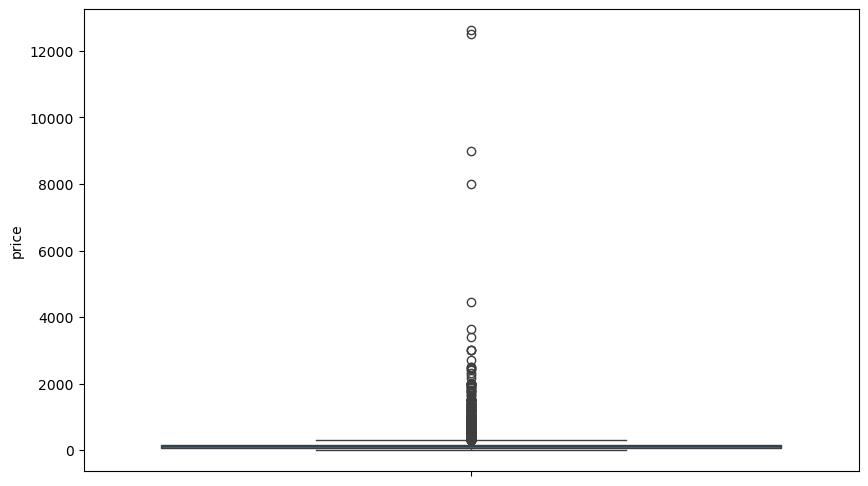

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'])

In [82]:
len(df[df['price'] == 0]) / len(df)*100
df = df[df['price'] != 0]
df.shape

(22874, 11)

## 1박 가격이 0인 비율 확인

In [83]:
len(df[df['price'] ==0]) / len(df) *100

0.0

In [84]:
df = df[df['price'] != 0]
df.shape

(22874, 11)

## 객실 유형에 따른 가격 분포

In [85]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<Axes: xlabel='room_type', ylabel='price'>

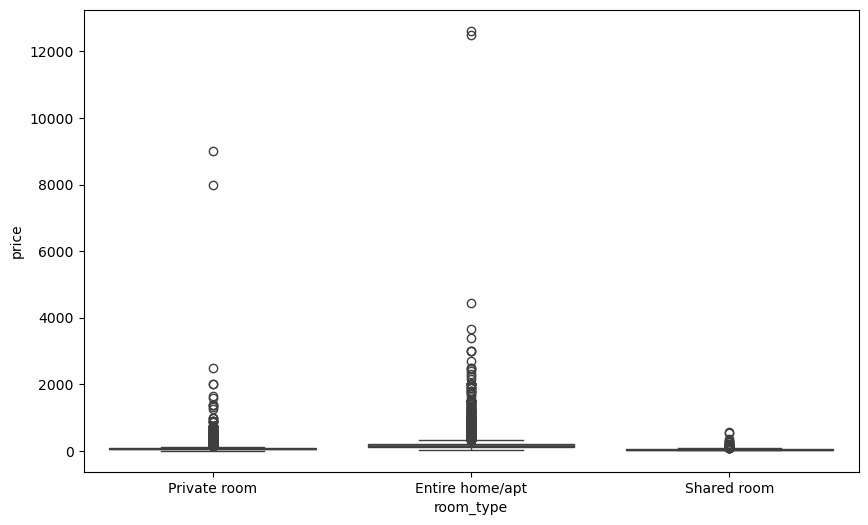

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)

In [87]:
df[df['room_type'] == 'Private room']['price'].describe()

count    8111.000000
mean       80.028110
std       157.481308
min         1.000000
25%        48.000000
50%        60.000000
75%        80.000000
max      9000.000000
Name: price, dtype: float64

In [88]:
df[df['room_type'] == 'Private room'][df['price'] > 4000]

/tmp/ipykernel_3421523/3354875905.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



host_id neighbourhood  latitude   longitude     room_type  price  \
id                                                                             
16181637  105660264    Boroondara -37.78566  145.062014  Private room   8000   
16359110  107127376     Melbourne -37.80644  144.962038  Private room   9000   

          minimum_nights  number_of_reviews  reviews_per_month  \
id                                                               
16181637             365                  1               0.11   
16359110              30                  0                NaN   

          calculated_host_listings_count  availability_365  
id                                                          
16181637                               1                 0  
16359110                               1               365

## Private room 의 인 Boroondara, Meldourne 의 객실 가격 평균값

<Axes: xlabel='neighbourhood'>

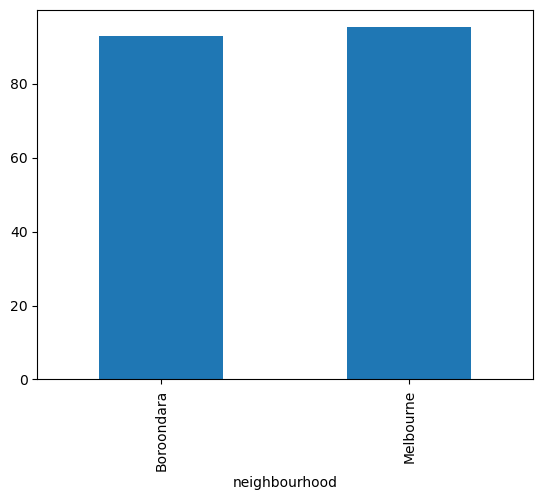

In [89]:
df[df['room_type'] =='Private room'].groupby('neighbourhood')['price'].mean().loc[['Boroondara', 'Melbourne']].plot(kind='bar')

## Private room 의 이웃인 Boroondara, Meldourne 의 객실 가격 중간값

<Axes: xlabel='neighbourhood'>

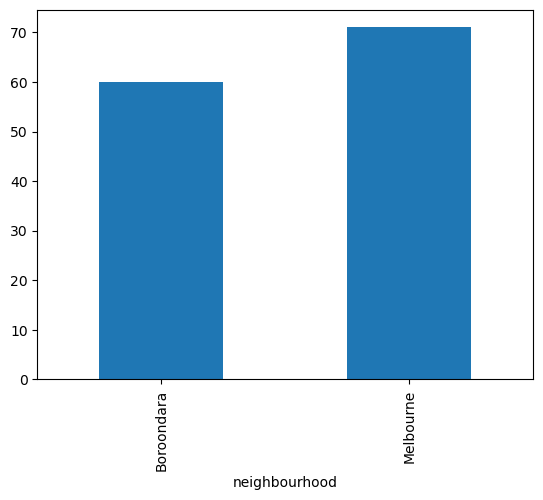

In [90]:
df[df['room_type'] =='Private room'].groupby('neighbourhood')['price'].median().loc[['Boroondara', 'Melbourne']].plot(kind='bar')

## 지역별 호텔의 갯수

In [91]:
df.groupby(['neighbourhood'])['host_id'].count()

neighbourhood
Banyule               203
Bayside               374
Boroondara            662
Brimbank              108
Cardinia              123
Casey                 153
Darebin               698
Frankston             177
Glen Eira             631
Greater Dandenong     147
Hobsons Bay           239
Hume                  170
Kingston              309
Knox                  175
Manningham            304
Maribyrnong           436
Maroondah             115
Melbourne            7365
Melton                 95
Monash                570
Moonee Valley         343
Moreland              967
Nillumbik              88
Port Phillip         2807
Stonnington          1620
Whitehorse            613
Whittlesea            137
Wyndham               426
Yarra                2049
Yarra Ranges          770
Name: host_id, dtype: int64

In [92]:
count_neighbours = df.groupby(['neighbourhood'])['host_id'].count().sort_values(ascending=False)

<Axes: ylabel='neighbourhood'>

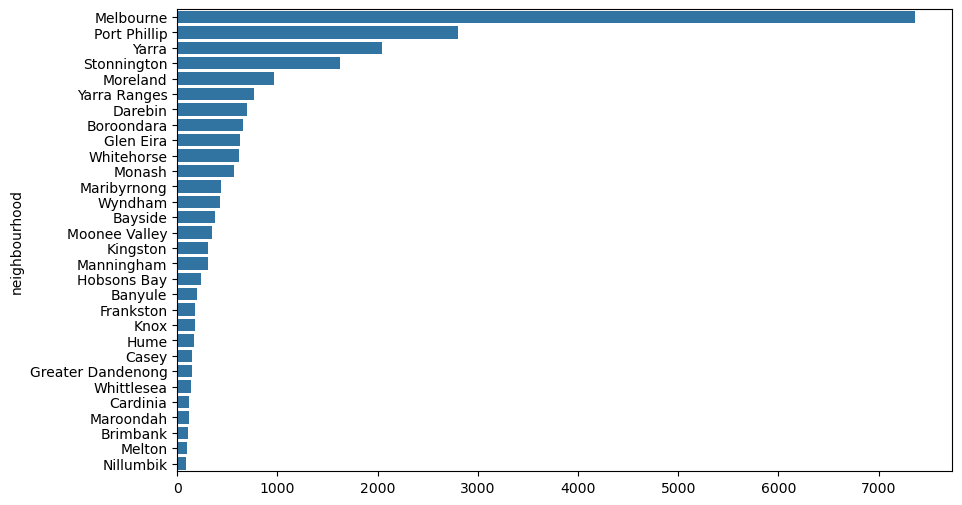

In [93]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=count_neighbours.values, y=count_neighbours.index)

## Folium 지도 시각화
멜버른이 가장 높은 밀도를 가지고 있다.(고층 아파트 건물이 많은 이유)

In [94]:
import folium
from folium import plugins
from folium.plugins import HeatMap
map_heat = folium.Map(location=[-37.818792, 144.962490], zoom_start=13)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22874 entries, 9835 to 30593623
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         22874 non-null  int64  
 1   neighbourhood                   22874 non-null  object 
 2   latitude                        22874 non-null  float64
 3   longitude                       22874 non-null  float64
 4   room_type                       22874 non-null  object 
 5   price                           22874 non-null  int64  
 6   minimum_nights                  22874 non-null  int64  
 7   number_of_reviews               22874 non-null  int64  
 8   reviews_per_month               17638 non-null  float64
 9   calculated_host_listings_count  22874 non-null  int64  
 10  availability_365                22874 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 2.6+ MB


In [96]:
df_location = df[['latitude', 'longitude']]
df_location.head()

latitude   longitude
id                          
9835  -37.772684  145.092133
10803 -37.766505  144.980736
12936 -37.859755  144.977369
15246 -37.758971  144.989228
16760 -37.864530  144.992238

In [97]:
for index, row in df_location.iterrows():
    print(index, row)

9835 latitude     -37.772684
longitude    145.092133
Name: 9835, dtype: float64
10803 latitude     -37.766505
longitude    144.980736
Name: 10803, dtype: float64
12936 latitude     -37.859755
longitude    144.977369
Name: 12936, dtype: float64
15246 latitude     -37.758971
longitude    144.989228
Name: 15246, dtype: float64
16760 latitude     -37.864530
longitude    144.992238
Name: 16760, dtype: float64
38271 latitude     -38.057254
longitude    145.339356
Name: 38271, dtype: float64
41836 latitude     -37.697294
longitude    145.000816
Name: 41836, dtype: float64
43414 latitude     -37.810267
longitude    144.985920
Name: 43414, dtype: float64
43429 latitude     -37.899601
longitude    145.114475
Name: 43429, dtype: float64
44082 latitude     -38.149320
longitude    145.141569
Name: 44082, dtype: float64
47100 latitude     -37.818037
longitude    145.004416
Name: 47100, dtype: float64
50492 latitude     -37.861275
longitude    144.980379
Name: 50492, dtype: float64
51592 latitude    

In [98]:
heat_data = [[row['latitude'], row['longitude']] 
             for index, row in df_location.iterrows()]
HeatMap(heat_data).add_to(map_heat)

map_heat

In [99]:
from folium.plugins import FastMarkerCluster
lat = df['latitude']
lon = df['longitude']
locations = list(zip(lat, lon))

map_mel = folium.Map(location=[-37.818792, 144.962490], zoom_start=10)
FastMarkerCluster(data=locations).add_to(map_mel)
map_mel

## 객실 타입에 따른 지역별 객실 가격 산점도

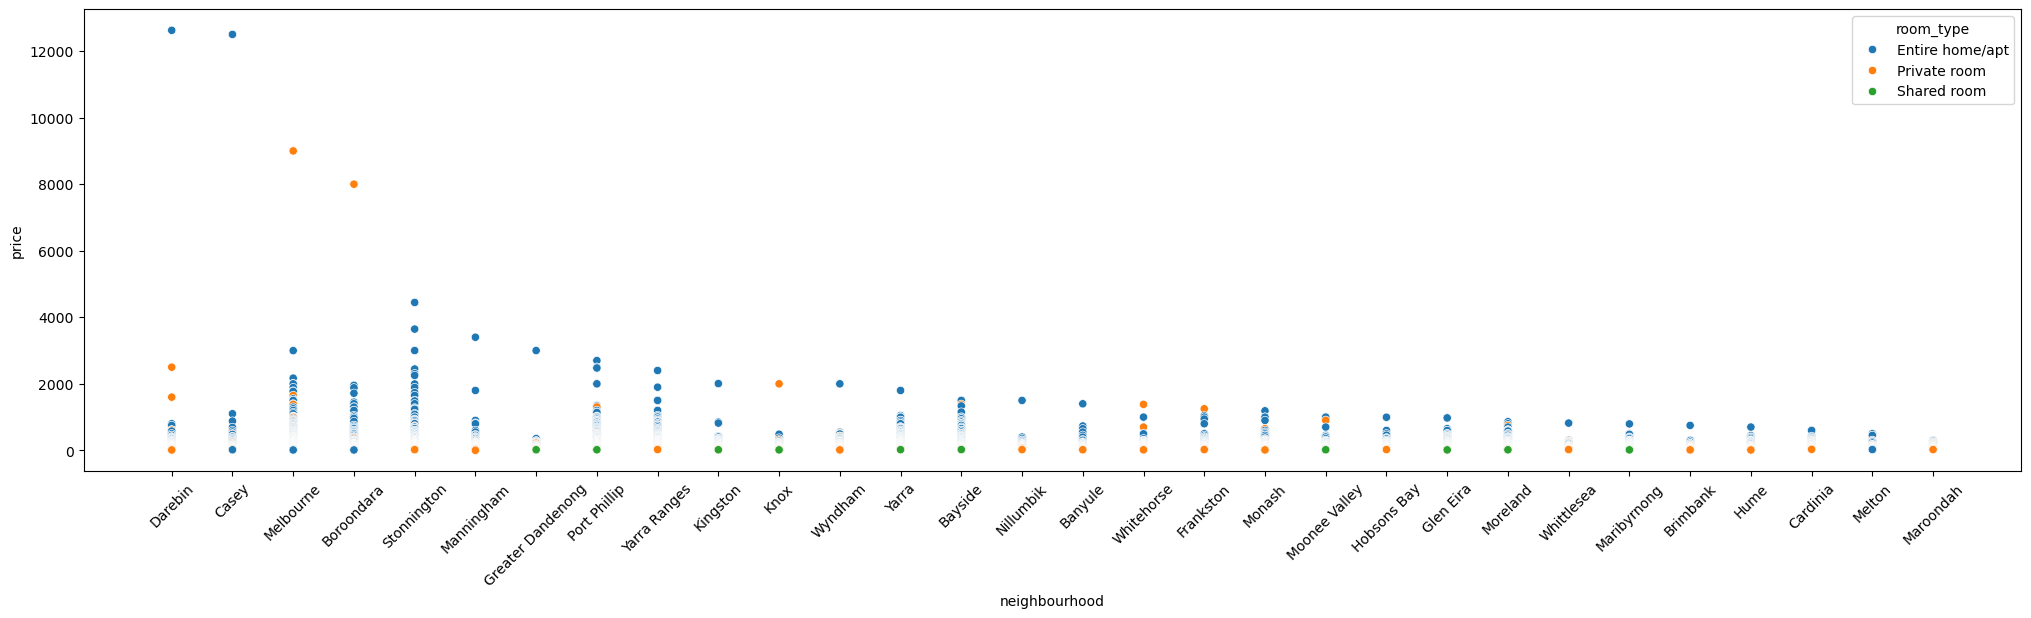

In [100]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='neighbourhood', y='price', data=df.sort_values('price', ascending=False), hue='room_type')
plt.xticks(rotation=45)
plt.show()

## 지역별 객실 가격 Top20
### 객실 타입별

In [101]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace1 =go.Scatter(
                    x = df[df['room_type']=='Entire home/apt'].sort_values('price',ascending=False).head(20)['neighbourhood'],
                    y = df[df['room_type']=='Entire home/apt'].sort_values('price',ascending=False).head(20)['price'],
                    mode = "markers",
                    name = "Entire home/apt",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'))

trace2 =go.Scatter(
                    x = df[df['room_type']=='Private room'].sort_values('price',ascending=False).head(20)['neighbourhood'],
                    y = df[df['room_type']=='Private room'].sort_values('price',ascending=False).head(20)['price'],
                    mode = "markers",
                    name = "Private room",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'))

trace3 =go.Scatter(
                    x = df[df['room_type']=='Shared room'].sort_values('price',ascending=False).head(20)['neighbourhood'],
                    y = df[df['room_type']=='Shared room'].sort_values('price',ascending=False).head(20)['price'],
                    mode = "markers",
                    name = "Shared room",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'))

data = [trace1, trace2, trace3]
layout = dict(title = 'Top 20 expensive df',
              xaxis= dict(title= 'Neighbourhood',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## 지역별 객실 가격 Bottom50
### 객실 타입별

In [102]:
trace1 =go.Scatter(
                    x = df[df['room_type']=='Entire home/apt'].sort_values('price').head(50)['neighbourhood'],
                    y = df[df['room_type']=='Entire home/apt'].sort_values('price').head(50)['price'],
                    mode = "markers",
                    name = "Entire home/apt",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'))

trace2 =go.Scatter(
                    x = df[df['room_type']=='Private room'].sort_values('price').head(50)['neighbourhood'],
                    y = df[df['room_type']=='Private room'].sort_values('price').head(50)['price'],
                    mode = "markers",
                    name = "Private room",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'))

trace3 =go.Scatter(
                    x = df[df['room_type']=='Shared room'].sort_values('price').head(50)['neighbourhood'],
                    y = df[df['room_type']=='Shared room'].sort_values('price').head(50)['price'],
                    mode = "markers",
                    name = "Shared room",
                    marker = dict(color = 'rgba(0, 255, 500, 0.8)'))

data = [trace1, trace2, trace3]
layout = dict(title = 'Cheapest 50',
              xaxis= dict(title= 'Neighbourhood',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## All listing with Price

In [103]:
trace1 =go.Scatter(
                    x = df[df['room_type']=='Entire home/apt'].sort_values('price')['neighbourhood'],
                    y = df[df['room_type']=='Entire home/apt'].sort_values('price')['price'],
                    mode = "markers",
                    name = "Entire home/apt",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'))

trace2 =go.Scatter(
                    x = df[df['room_type']=='Private room'].sort_values('price')['neighbourhood'],
                    y = df[df['room_type']=='Private room'].sort_values('price')['price'],
                    mode = "markers",
                    name = "Private room",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'))

trace3 =go.Scatter(
                    x = df[df['room_type']=='Shared room'].sort_values('price')['neighbourhood'],
                    y = df[df['room_type']=='Shared room'].sort_values('price')['price'],
                    mode = "markers",
                    name = "Shared room",
                    marker = dict(color = 'rgba(0, 255, 500, 0.8)'))

data = [trace1, trace2, trace3]
layout = dict(title = 'All listing with Price',
              xaxis= dict(title= 'Neighbourhood',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## 객실 유형에 대한 비율의 차이가 높은 지역을 확인
- 우리는 이미 사람들이 돈을 버는 사업을 위해 AirBnB를 사용하고 있다는 것을 알 수 있지만 (정확합니다) 사용자가 다른 배경을 가진 사람들과 숙소를 공유함으로써 다양한 다양한 환경을 경험하기를 원했기 때문에 회사의 주요 목표가 아닌 집/아파트 전체를 재 임대하고 있습니다.

In [104]:
count = df.groupby(['neighbourhood', 'room_type'])['room_type'].count().unstack() # 재구조화

In [105]:
count.head()

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Banyule                  105.0          93.0          5.0
Bayside                  259.0         108.0          7.0
Boroondara               339.0         311.0         12.0
Brimbank                  29.0          79.0          NaN
Cardinia                  74.0          48.0          1.0

In [106]:
count.replace(np.NaN, 0, inplace=True)
count_proportion = count.div(count.sum(axis=1), axis=0)
count_proportion.head()

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Banyule               0.517241      0.458128     0.024631
Bayside               0.692513      0.288770     0.018717
Boroondara            0.512085      0.469789     0.018127
Brimbank              0.268519      0.731481     0.000000
Cardinia              0.601626      0.390244     0.008130

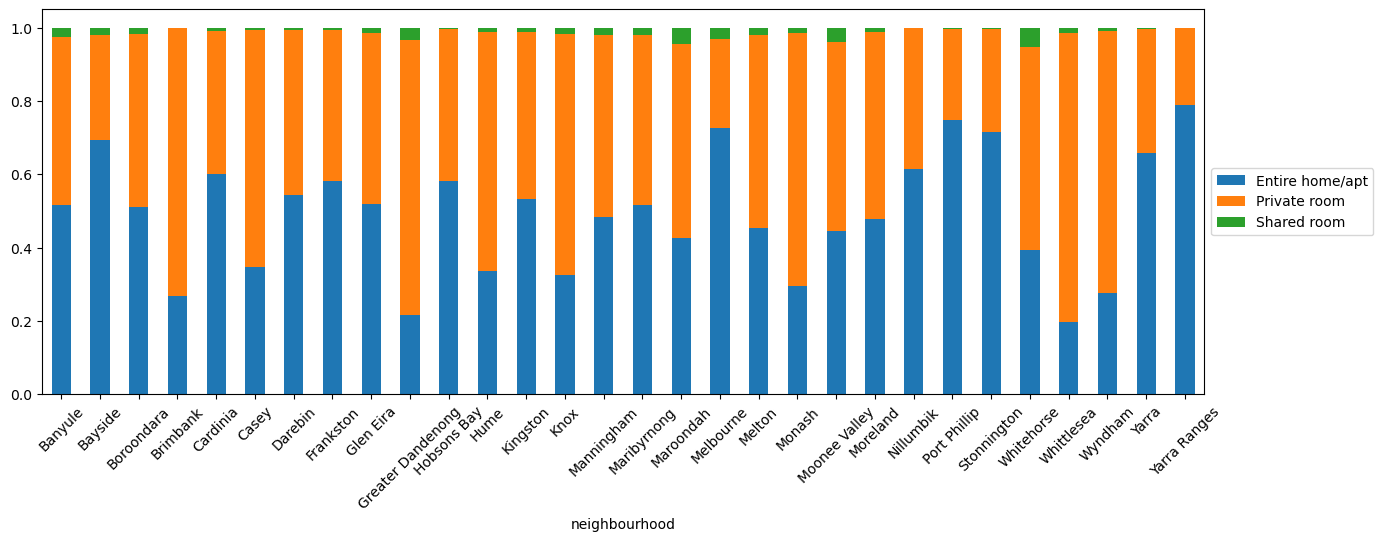

In [107]:
count_proportion.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()